Posición Inicial: 
partícula 1:  [1.5 0.  0. ]
partícula 2:  [0. 0. 0.]
Posición FINAL: 
partícula 1:  [1.00000455 0.         0.        ]
partícula 2:  [4.99995448e-06 0.00000000e+00 0.00000000e+00]
Error absoluto porcentual:  0.001012432249769546 %


Text(0, 0.5, '[distancia]')

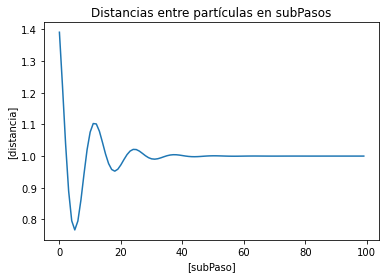

In [504]:
"""/*
Copyright 2022 Mauro Fermin - af_mauro7@hotmail.com
License  Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional.
https://creativecommons.org/licenses/by-sa/4.0/
Implementation of papers: 
* Macklin, Miles, Matthias Müller, and Nuttapong Chentanez. "XPBD: position-based simulation of compliant constrained dynamics." Proceedings of the 9th International Conference on Motion in Games. (2016).
* Macklin, Miles, et al. "Small Steps in Physics Simulation." (2019).
*/"""

import numpy as np
import math as m
import matplotlib.pyplot as plt

gData = []

time_step = 0.001 #timestep 
Iteration = 100 #iterations

restLen=1.0 # distancia de aproximación

compliance = 0.001
dt = 1/60.0 # frames
#~α=α/Δt^2 
alpha = compliance /dt/dt


class particle:
    def __init__(self, pos, m):
        self.m = m
        self.w = 1.0/self.m
        self.x = np.array(pos)
        self.p = np.array(pos)
        self.v = np.array([0.0, 0.0, 0.0])
        self.f = np.array([0.0, 0.0, 0.0])
        
    def getPos(self):
        return self.x
    
    def printPos(self):
        print(self.x)


particles =[]
particles.append(particle([1.5,0.0,0.0], 1.0))
particles.append(particle([0.0,0.0,0.0], 100000))

#(Ec.6 at. M.Macklin)
dtIt=time_step/Iteration

print("Posición Inicial: ")
print("partícula 1: ", particles[0].getPos())
print("partícula 2: ", particles[1].getPos())

for i in range(Iteration):
    
    #Predicción de posición usando cálculo de velocidad siguiente: 
    #x ⇐ x^n + ∆t_s v^n + ∆t_s^2 M^{-1}f_{ext}(x^n)
    
    # Calculo de la velocidad siguiente
    for particle in particles:
            #v[]= v[]+f[]*dtIt*(1/m)
            particle.v = particle.v+ particle.f*dtIt*particle.w
    
    # Predicción de posición usando velocidad calculada
    for particle in particles:
        #p[] = x[] + v[]* dtIt
        particle.p = particle.x + particle.v * dtIt
    
   
    #Calculo de gradiente:
    # ∆λ using Eq (7)
    grad = np.array([particles[0].p[0] - particles[1].p[0], 
                     particles[0].p[1] - particles[1].p[1], 
                     particles[0].p[2] - particles[1].p[2]])
    
    #normalización de gradiente
    length = m.sqrt(grad[0]**2 + grad[1]**2 + grad[2]**2)
    grad /=length
    
    C =length - restLen
    w = particles[0].w+particles[1].w
    
    # ∆λi = −Ci(x) / [ ∇Ci M^(-1) ∇Ci^T + ̃α_i]   (Ec. 7 at. M.Macklin)
    lagrangeMultiplier = -C /(w+alpha)

    #Cálculo vector desplazamiento
    #∆x = ∇C(xi)^T ∆λ M^(-1) (Ec.17 at. M.Müller or Ec. 4 M.Mackin)
    particles[0].p += grad *( lagrangeMultiplier) * particles[0].w
    particles[1].p += grad *(-lagrangeMultiplier) * particles[1].w
    

    #Actualización de las velocidades
    # v^{n+1} ⇐ 1/∆t_s * (x^{n+1} − x^n)
    for particle in particles:
        temp = particle.p - particle.x
        particle.v = (1.0/dtIt)*temp

        particle.x = particle.p
        
    mod1 = m.sqrt(particles[0].getPos()[0]**2+particles[0].getPos()[1]**2+particles[0].getPos()[2]**2)
    mod2 = m.sqrt(particles[1].getPos()[0]**2+particles[1].getPos()[1]**2+particles[1].getPos()[2]**2)
    #print(mod1+mod2)
    data= abs(mod1+mod2)
    gData.append(data)
        

print("Posición FINAL: ")
print("partícula 1: ", particles[0].getPos())
print("partícula 2: ", particles[1].getPos())

 
mod1 = m.sqrt(particles[0].getPos()[0]**2+particles[0].getPos()[1]**2+particles[0].getPos()[2]**2)
mod2 = m.sqrt(particles[1].getPos()[0]**2+particles[1].getPos()[1]**2+particles[1].getPos()[2]**2)
#print(mod1+mod2)
Er_abs= abs((length-(mod1+mod2))/1.0*100)
print("Error absoluto porcentual: ",Er_abs, "%")


fig = plt.figure()
ax = fig.add_subplot(111)
hl, = plt.plot(gData)
plt.title("Distancias entre partículas en subPasos")
plt.xlabel("[subPaso]")
plt.ylabel("[distancia]")
        